In [1]:
import matplotlib.pyplot as plt

In [2]:
markers = ['^', 'D', 's', 'o', 'v', 'X', 'H', '8']
linestyles = ['-', '-.', ':', '--', '-.', '--', ':', '-']
data = {
    "": {
        "MJ": [],
        "Santos": [],
        "D3L": [],
        "WarpGate": [],
        "Starmie": [],
        "DeepJoin": [],
        "KGLiDS": [],
        "Freyja": [],
        # "Freyja with J": = [],
        # "Freyja with C" = []
    }
}
colors = [
    "#7f7f7f",  # gray
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#d62728",  # red
]

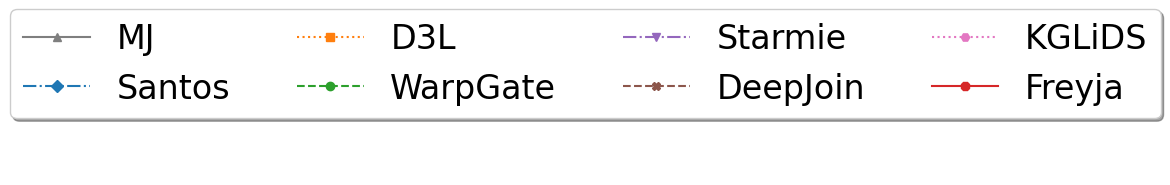

In [ ]:
# Get method names from the data dictionary (first metric as reference)
method_labels = list(next(iter(data.values())).keys())

# Create a standalone legend figure
fig, ax = plt.subplots(figsize=(10, 2))

for marker, linestyle, label, color in zip(markers, linestyles, method_labels, colors):
    ax.plot([], [], marker=marker, linestyle=linestyle, color=color, label=label)

ax.legend(
    fontsize=24,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.3),
    fancybox=True,
    shadow=True,
    ncol=4
)
ax.axis("off")

plt.tight_layout()
plt.show()
plt.close()

In [5]:
def plot_metric(metric_name, methods, x, save=True, outdir=".", ybottom=0.6, ytop=1.03):
    """
    Plots a single metric and optionally saves it as a PNG file.

    Args:
        metric_name (str): Name of the metric (e.g., "Precision@K").
        methods (dict): Dictionary of {method_name: values}.
        x (iterable): x-axis values.
        save (bool): Whether to save the figure.
        outdir (str): Directory to save plots.
    """
    plt.figure(figsize=(7, 5))

    # Iterate with styles
    for (method, values), marker, ls, color in zip(
        methods.items(), markers, linestyles, colors
    ):
        if method == "Freyja":  # Highlight your system
            plt.plot(
                x, values,
                marker=marker, linestyle="-", color="#d62728", linewidth=2,
                label=method, zorder=10, markersize=9,
            )
        else:  # Baselines (faded a bit)
            plt.plot(
                x, values,
                marker=marker, linestyle=ls, color=color, linewidth=1.8,
                alpha=0.8, label=method, markersize=6,
            )

    # Axis labels & formatting
    plt.xlabel("K", fontsize=14)
    x_min, x_max = min(x), max(x)
    margin = 0.03 * (x_max - x_min) if x_max > x_min else 1
    plt.xlim(x_min - margin, x_max + margin)
    plt.xticks(x, fontsize=12)

    plt.ylabel(metric_name, fontsize=14)
    plt.ylim(ybottom, ytop)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.show()

    if save:
        filename = f"{outdir}/{metric_name.lower().replace('@', '_at_').replace('/', '_')}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()


### Santos Small

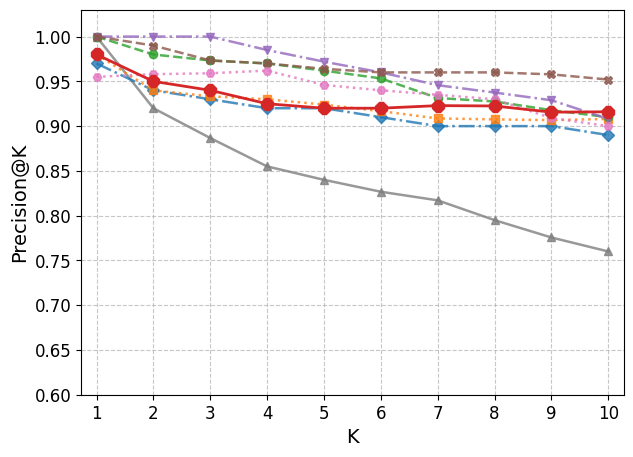

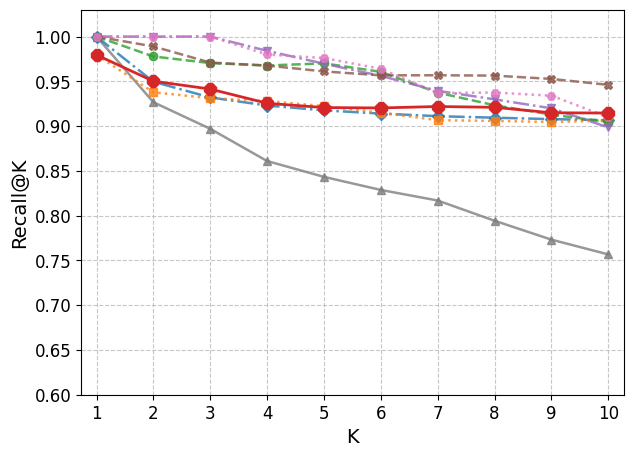

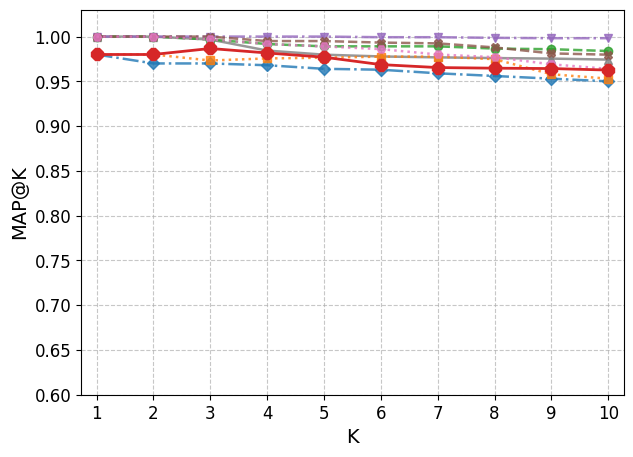

In [6]:
x = range(1, 11)

data = {
    "Precision@K": {
        "Freyja no K": [1.0, 0.92, 0.8867, 0.855, 0.84, 0.8267, 0.8171, 0.795, 0.7756, 0.76],
        "Santos": [0.97, 0.94, 0.93, 0.92, 0.92, 0.91, 0.90, 0.90, 0.90, 0.89],
        "D3L": [0.98, 0.94, 0.9333, 0.93, 0.924, 0.9167, 0.9086, 0.9075, 0.9067, 0.908],
        "WarpGate": [1.0, 0.98, 0.9733, 0.97, 0.962, 0.9533, 0.9314, 0.9275, 0.9178, 0.91],
        "Starmie": [1.0, 1.0, 1.0, 0.985, 0.972, 0.96, 0.9457, 0.9375, 0.9289, 0.908],
        "DeepJoin": [1.0, 0.99, 0.9733, 0.97, 0.964, 0.96, 0.96, 0.96, 0.9578, 0.952],
        "KGLiDS": [0.955, 0.958, 0.959, 0.962, 0.946, 0.94, 0.935, 0.93, 0.909, 0.9],
        "Freyja": [0.98, 0.95, 0.94, 0.925, 0.92, 0.92, 0.9229, 0.9225, 0.9156, 0.916],
        # "Freyja with J": = [1.0, 0.96, 0.9467, 0.925, 0.92, 0.9133, 0.9114, 0.91, 0.9044, 0.9],
        # "Freyja with C" = [0.98, 0.96, 0.9533, 0.945, 0.936, 0.92, 0.92, 0.9125, 0.9089, 0.904]
    },
    "Recall@K" : {
        "Freyja no K": [1.0, 0.9267, 0.897, 0.861, 0.8433, 0.8287, 0.8169, 0.7943, 0.7732, 0.7567],
        "Santos": [1.0, 0.9496, 0.9320, 0.9230, 0.9176, 0.9140, 0.9111, 0.9094, 0.9078, 0.9066],
        "D3L": [0.9795, 0.9378, 0.9312, 0.928, 0.9223, 0.915, 0.9066, 0.9058, 0.9046, 0.9061],
        "WarpGate": [1.0, 0.9778, 0.9704, 0.9677, 0.9701, 0.9606, 0.9374, 0.9233, 0.9129, 0.9046],
        "Starmie": [1.0, 1.0, 1.0, 0.9841, 0.9697, 0.9561, 0.9394, 0.9299, 0.9199, 0.8986],
        "DeepJoin": [1.0, 0.989, 0.971, 0.9676, 0.9611, 0.9567, 0.9568, 0.9564, 0.9527, 0.9461],
        "KGLiDS": [1.0, 1.0, 1.0, 0.98, 0.976, 0.964, 0.937, 0.9375, 0.934, 0.91],
        "Freyja": [0.9795, 0.9502, 0.9414, 0.9255, 0.9207, 0.9203, 0.9219, 0.921, 0.9149, 0.9146],
        # "Freyja with J": = [1.0, 0.9582, 0.9458, 0.9232, 0.9177, 0.911, 0.909, 0.9073, 0.902, 0.8978],
        # "Freyja with C" = [0.9795, 0.9579, 0.9497, 0.9414, 0.9314, 0.9151, 0.9146, 0.9071, 0.9032, 0.8976]
    },
    "MAP@K" : {
        "Freyja no K": [1.0, 1.0, 0.9967, 0.9844, 0.9798, 0.9778, 0.9768, 0.976, 0.9754, 0.9743],
        "Santos": [0.98, 0.97, 0.97, 0.968, 0.964, 0.963, 0.959, 0.956, 0.953, 0.95],
        "D3L": [0.98, 0.98, 0.9733, 0.9756, 0.9764, 0.9776, 0.9776, 0.9748, 0.9579, 0.953],
        "WarpGate": [1.0, 1.0, 0.9967, 0.9917, 0.9891, 0.9891, 0.9891, 0.9866, 0.9859, 0.9839],
        "Starmie": [1.0, 1.0, 1.0, 1.0, 1.0, 0.9993, 0.9993, 0.9986, 0.9982, 0.9982],
        "DeepJoin": [1.0, 1.0, 1.0, 0.995, 0.995, 0.9933, 0.9924, 0.9879, 0.9812, 0.9798],
        "KGLiDS": [1.0, 1.0, 0.9969, 0.9917, 0.989, 0.986, 0.98, 0.977, 0.969, 0.964],
        "Freyja": [0.98, 0.98, 0.9867, 0.9817, 0.977, 0.9687, 0.9654, 0.9647, 0.9643, 0.9626],
        # "Freyja with J": = [1.0, 1.0, 0.9967, 0.9967, 0.9924, 0.9893, 0.9876, 0.9864, 0.9863, 0.9863],
        # "Freyja with C" = [0.98, 0.98, 0.9767, 0.9811, 0.9801, 0.9797, 0.9779, 0.9774, 0.9751, 0.9734]
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False)

### TUS Small

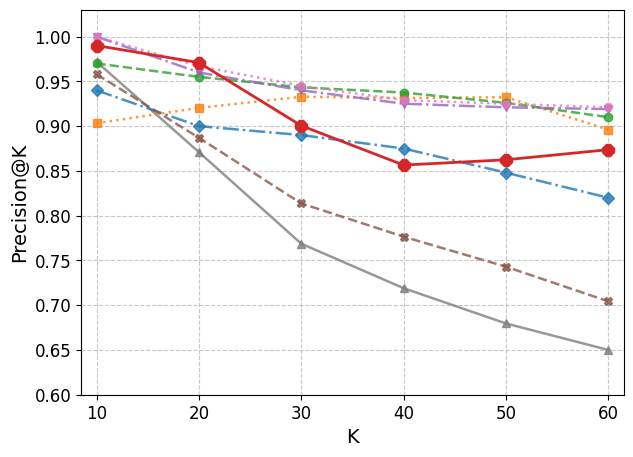

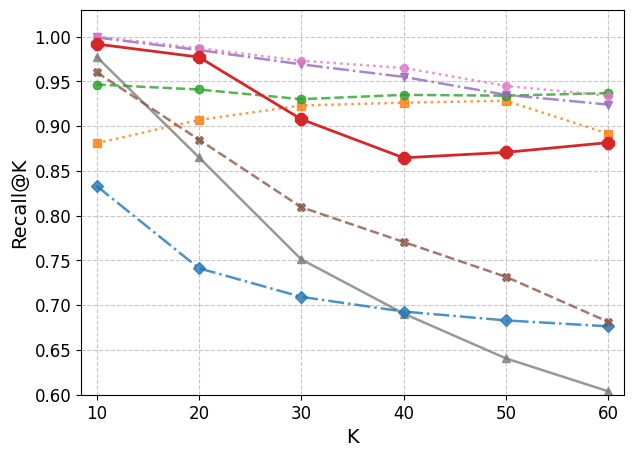

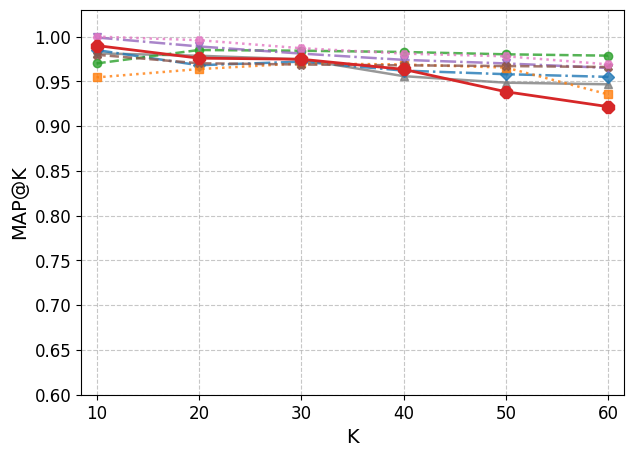

In [7]:
x = range(10, 70, 10)

data = {
    "Precision@K": {
        "Freyja no K": [0.972, 0.871, 0.7687, 0.719, 0.6796, 0.65],
        "Santos": [0.94, 0.9, 0.89, 0.875, 0.848, 0.82],
        "D3L": [0.9032, 0.9204, 0.9328, 0.9314, 0.9323, 0.8961],
        "WarpGate": [0.97, 0.955, 0.9433, 0.9375, 0.926, 0.91],
        "Starmie": [1.0, 0.96, 0.94, 0.925, 0.921, 0.919],
        "DeepJoin": [0.958, 0.887, 0.8137, 0.7765, 0.743, 0.7043],
        "KGLiDS": [1.0, 0.967, 0.945, 0.929, 0.925, 0.921],
        "Freyja": [0.99, 0.9709, 0.9005, 0.8565, 0.8624, 0.8737],
        # "Freyja with J": = [0.972, 0.9095, 0.8557, 0.8642, 0.8734, 0.8838],
        # "Freyja with C" = [0.973, 0.909, 0.836, 0.7653, 0.6872, 0.6352]
    },
    "Recall@K" : {
        "Freyja no K": [0.9776, 0.8652, 0.7512, 0.6907, 0.6406, 0.6038],
        "Santos": [0.8333, 0.7413, 0.7093, 0.6929, 0.6830, 0.6764],
        "D3L": [0.8808, 0.9069, 0.9230, 0.9262, 0.9283, 0.8915],
        "WarpGate": [0.9464, 0.9409, 0.9301, 0.9349, 0.934, 0.9369],
        "Starmie": [0.999, 0.985, 0.969, 0.955, 0.935, 0.924],
        "DeepJoin": [0.9603, 0.885, 0.8095, 0.7706, 0.7317, 0.6814],
        "KGLiDS": [1, 0.987, 0.973, 0.965, 0.945, 0.934],
        "Freyja": [0.9917, 0.9771, 0.9077, 0.8646, 0.8707, 0.8816],
        # "Freyja with J": = [0.9779, 0.9167, 0.8636, 0.872, 0.8811, 0.8911],
        # "Freyja with C" = [0.9787, 0.9162, 0.8385, 0.7588, 0.6657, 0.6037]

    },
    "MAP@K" : {
        "Freyja no K": [0.9813, 0.9786, 0.9746, 0.9558, 0.9485, 0.9467],
        "Santos": [0.985, 0.968, 0.972, 0.962, 0.958, 0.955],
        "D3L": [0.9544, 0.9637, 0.9701, 0.9688, 0.9654, 0.9354],
        "WarpGate": [0.97, 0.985, 0.9842, 0.9828, 0.9802, 0.9787],
        "Starmie": [0.999, 0.989, 0.981, 0.974, 0.97, 0.965],
        "DeepJoin": [0.9797, 0.9702, 0.9688, 0.9679, 0.9671, 0.966],
        "KGLiDS": [1, 0.996, 0.987, 0.981, 0.978, 0.969],
        "Freyja": [0.99, 0.9759, 0.9747, 0.9634, 0.9384, 0.9217],
        # "Freyja with J": = [0.9799, 0.978, 0.9706, 0.9419, 0.925, 0.9171],
        # "Freyja with C" = [0.9736, 0.9739, 0.9739, 0.9738, 0.9736, 0.9735]
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False)

### TUS Big

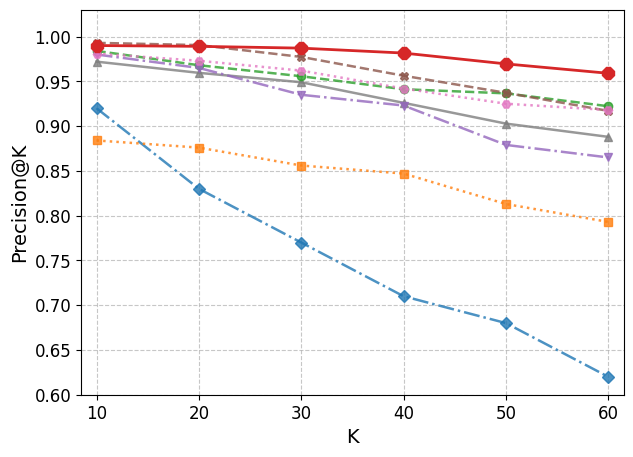

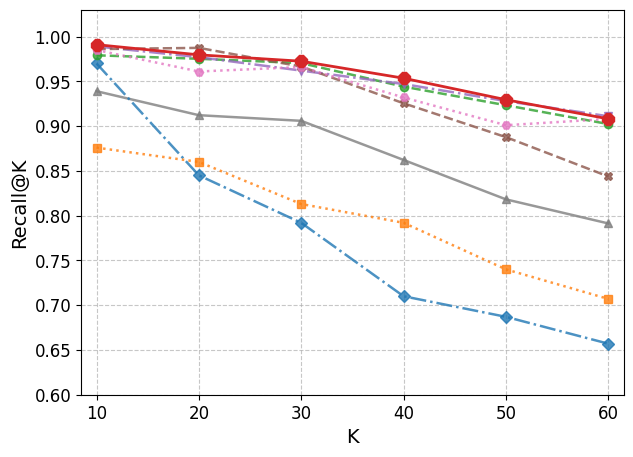

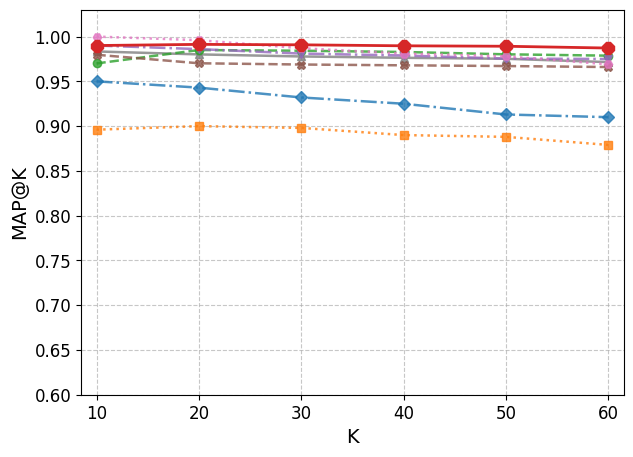

In [8]:
x = range(10, 70, 10)

data = {
    "Precision@K": {
        "Freyja no K": [0.972, 0.9595, 0.949, 0.926, 0.9028, 0.888],
        "Santos": [0.92, 0.83, 0.77, 0.71, 0.68, 0.62],
        "D3L": [0.884, 0.876, 0.856, 0.847, 0.813, 0.793],
        "WarpGate": [0.984, 0.968, 0.9557, 0.9412, 0.9366, 0.9222],
        "Starmie": [0.98, 0.965, 0.935, 0.923, 0.879, 0.865],
        "DeepJoin": [0.993, 0.9905, 0.9773, 0.9563, 0.9372, 0.917],
        "KGLiDS": [0.981, 0.973, 0.962, 0.942, 0.925, 0.918],
        "Freyja": [0.99, 0.9891, 0.9871, 0.9816, 0.9695, 0.959],
    },
    "Recall@K" : {
        "Freyja no K": [0.939, 0.9122, 0.9059, 0.8622, 0.8182, 0.7913],
        "Santos": [0.97, 0.845, 0.792, 0.71, 0.687, 0.657],
        "D3L": [0.876, 0.86, 0.813, 0.792, 0.74, 0.707],
        "WarpGate": [0.9791, 0.9752, 0.9704, 0.9441, 0.9233, 0.9023],
        "Starmie": [0.989, 0.977, 0.962, 0.947, 0.928, 0.911],
        "DeepJoin": [0.986, 0.9874, 0.9665, 0.9255, 0.8877, 0.8438],
        "KGLiDS": [0.985, 0.961, 0.966, 0.932, 0.901, 0.908],
        "Freyja": [0.991, 0.9796, 0.9725, 0.9535, 0.9295, 0.9081],

    },
    "MAP@K" : {
        "Freyja no K": [0.9834, 0.9801, 0.9778, 0.9763, 0.9752, 0.9715],
        "Santos": [0.95, 0.943, 0.932, 0.925, 0.913, 0.910],
        "D3L": [0.896, 0.90, 0.898, 0.89, 0.888, 0.879],
        "WarpGate": [0.97, 0.985, 0.9842, 0.9828, 0.9802, 0.9787],
        "Starmie": [0.99, 0.986, 0.981, 0.9789, 0.9754, 0.975],
        "DeepJoin": [0.9797, 0.9702, 0.9688, 0.9679, 0.9671, 0.966],
        "KGLiDS": [1, 0.996, 0.987, 0.981, 0.978, 0.969],
        "Freyja": [0.99, 0.9913, 0.9908, 0.9897, 0.9892, 0.9872],
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False)

### D3L

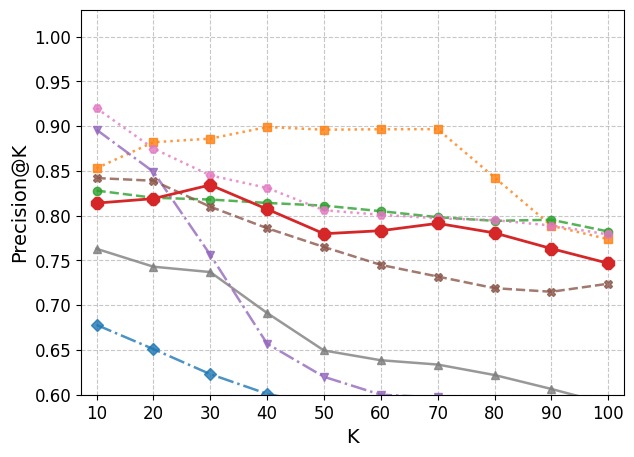

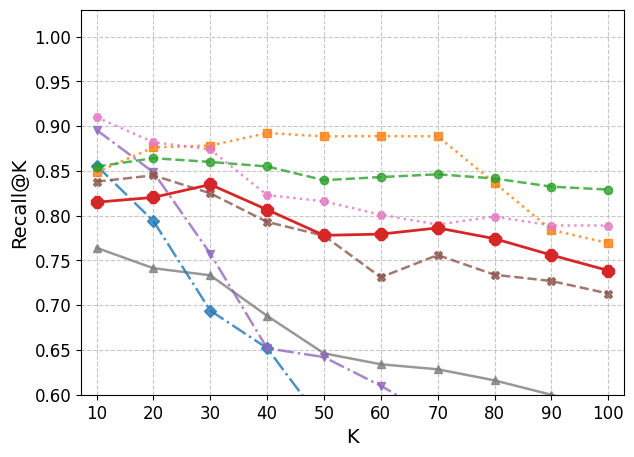

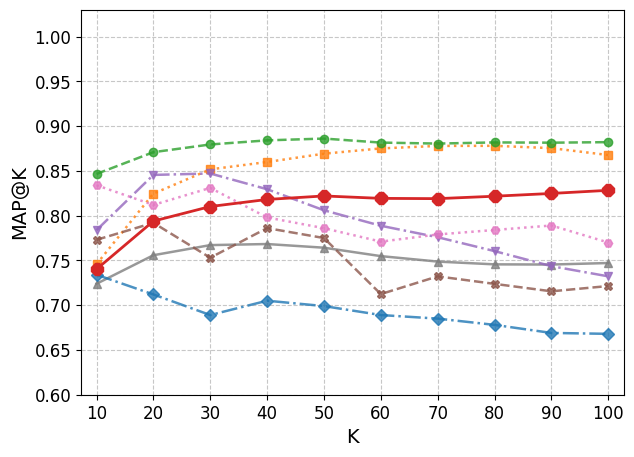

In [9]:
x = range(10, 110, 10)

data = {
    "Precision@K": {
        "Freyja no K": [0.763, 0.743, 0.737, 0.6913, 0.6494, 0.6385, 0.6337, 0.622, 0.6064, 0.5896],
        "Santos": [0.678, 0.651, 0.623, 0.601, 0.588, 0.578, 0.578, 0.565, 0.530, 0.517],
        "D3L": [0.853, 0.882, 0.886, 0.899, 0.896, 0.8965, 0.8966, 0.8426, 0.7887, 0.7737],
        "WarpGate": [0.828, 0.82, 0.818, 0.8142, 0.8112, 0.805, 0.7983, 0.7942, 0.7954, 0.7823],
        "Starmie": [0.896, 0.849, 0.7563, 0.657, 0.62, 0.6, 0.597, 0.546, 0.524, 0.511],
        "DeepJoin": [0.842, 0.839, 0.81, 0.786, 0.765, 0.745, 0.732, 0.719, 0.715, 0.724],
        "KGLiDS": [0.92, 0.875, 0.845, 0.831, 0.806, 0.801, 0.797, 0.795, 0.789, 0.779],
        "Freyja": [0.814, 0.819, 0.8343, 0.8073, 0.7798, 0.7832, 0.7914, 0.7807, 0.7632, 0.7468],
        # "Freyja with J": = [0.869, 0.846, 0.7917, 0.7665, 0.7514, 0.7615, 0.774, 0.7736, 0.7647, 0.7548],
        # "Freyja with C" = [0.858, 0.8505, 0.795, 0.735, 0.695, 0.6672, 0.6487, 0.632, 0.6146, 0.6011]
    },
    "Recall@K" : {
        "Freyja no K": [0.7641, 0.7413, 0.7334, 0.6881, 0.6462, 0.634, 0.6284, 0.616, 0.5999, 0.5826],
        "Santos": [0.856, 0.794, 0.694, 0.652, 0.567, 0.543, 0.51, 0.45, 0.476, 0.443],
        "D3L": [0.8483, 0.8762, 0.8783, 0.8923, 0.8886, 0.8888, 0.8886, 0.8365, 0.7841, 0.7693],
        "WarpGate": [0.8548, 0.8642, 0.86, 0.8549, 0.8396, 0.8431, 0.8462, 0.8415, 0.8324, 0.8291],
        "Starmie": [0.8957, 0.8485, 0.7577, 0.6519, 0.642, 0.61, 0.573, 0.532, 0.519, 0.498],
        "DeepJoin": [0.838, 0.845, 0.825, 0.793, 0.7776, 0.7312, 0.756, 0.734, 0.727, 0.713],
        "KGLiDS": [0.91, 0.882, 0.874, 0.823, 0.816, 0.801, 0.79, 0.799, 0.789, 0.789],
        "Freyja": [0.815, 0.8204, 0.8348, 0.8067, 0.778, 0.7794, 0.7863, 0.7743, 0.756, 0.7387],
        # "Freyja with J": = [0.8673, 0.8436, 0.7881, 0.7607, 0.7449, 0.7537, 0.7655, 0.7653, 0.7564, 0.7463],
        # "Freyja with C" = [0.8565, 0.8487, 0.7942, 0.7335, 0.6937, 0.6649, 0.6454, 0.628, 0.6104, 0.5968]
    },
    "MAP@K" : {
        "Freyja no K": [0.7239, 0.7558, 0.7671, 0.7683, 0.7642, 0.7548, 0.7487, 0.7456, 0.7454, 0.7471],
        "Santos": [0.734, 0.712, 0.689, 0.705, 0.699, 0.689, 0.685, 0.678, 0.669, 0.668],
        "D3L": [0.7458, 0.8246, 0.8517, 0.8599, 0.8692, 0.8751, 0.8779, 0.878, 0.8754, 0.8677],
        "WarpGate": [0.8466, 0.8709, 0.8795, 0.8841, 0.8861, 0.8816, 0.8805, 0.8818, 0.8815, 0.8821],
        "Starmie": [0.7838, 0.8455, 0.8471, 0.8295, 0.806, 0.7887, 0.7759, 0.7604, 0.7436, 0.7322],
        "DeepJoin": [0.773, 0.792, 0.753, 0.7861, 0.775, 0.7124, 0.7322, 0.7238, 0.7155, 0.7214],
        "KGLiDS": [0.834, 0.812, 0.831, 0.798, 0.786, 0.771, 0.779, 0.784, 0.789, 0.77],
        "Freyja": [0.7402, 0.7939, 0.8102, 0.8181, 0.822, 0.8193, 0.819, 0.8217, 0.8248, 0.8283],
        # "Freyja with J": = [0.824, 0.8648, 0.8698, 0.8618, 0.8566, 0.8385, 0.8247, 0.8186, 0.8173, 0.8169],
        # "Freyja with C" = [0.8201, 0.8612, 0.8715, 0.8669, 0.8642, 0.8591, 0.8495, 0.8322, 0.826, 0.8163]
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False)

### Freyja

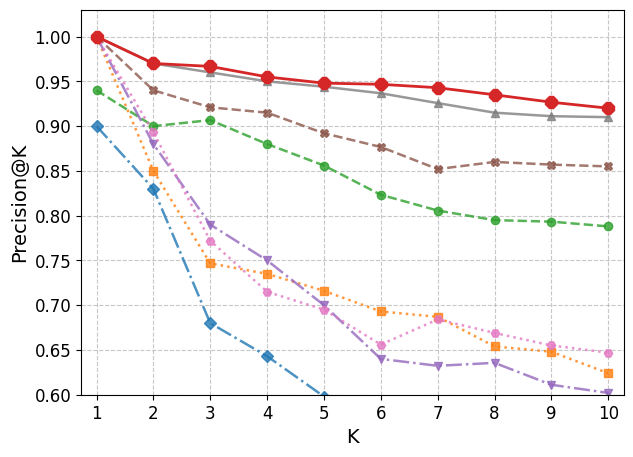

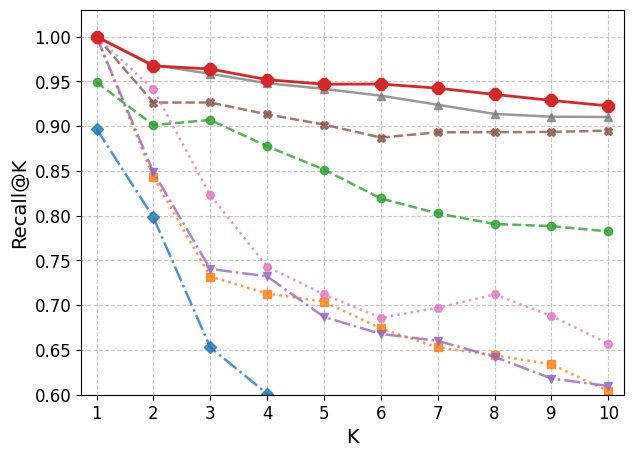

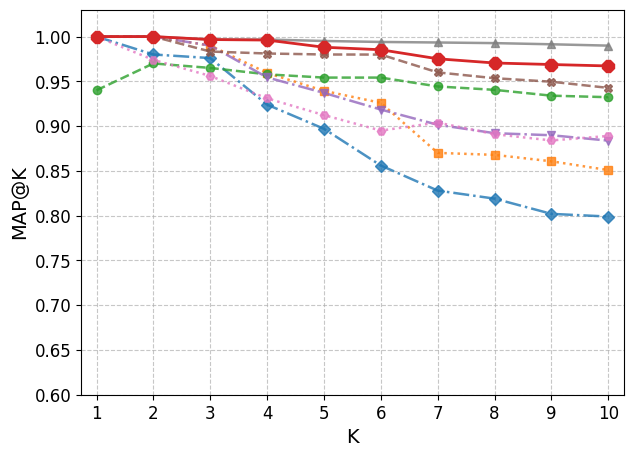

In [10]:
x = range(1, 11)

data = {
    "Precision@K": {
        "Freyja no K": [1.0, 0.97, 0.96, 0.95, 0.944, 0.9367, 0.9257, 0.915, 0.9111, 0.91],
        "Santos": [0.9, 0.83, 0.68, 0.643, 0.598, 0.587, 0.576, 0.571, 0.567, 0.569],
        "D3L": [1.0, 0.85, 0.7467, 0.735, 0.716, 0.693, 0.687, 0.654, 0.648, 0.624],
        "WarpGate": [0.94, 0.9, 0.9067, 0.88, 0.856, 0.8233, 0.8057, 0.795, 0.7933, 0.788],
        "Starmie": [1.0, 0.88, 0.79, 0.75, 0.7, 0.64, 0.6323, 0.6356, 0.6111, 0.602],
        "DeepJoin": [1.0, 0.94, 0.921, 0.915, 0.892, 0.8767, 0.852, 0.86, 0.857, 0.855],
        "KGLiDS": [1.0, 0.893, 0.772, 0.715, 0.695, 0.656, 0.6841, 0.669, 0.655, 0.647],
        "Freyja": [1.0, 0.97, 0.9667, 0.955, 0.948, 0.9467, 0.9429, 0.935, 0.9267, 0.92],
    },
    "Recall@K" : {
        "Freyja no K": [1.0, 0.9683, 0.9584, 0.9479, 0.9416, 0.934, 0.9239, 0.9136, 0.9105, 0.9102],
        "Santos": [0.897, 0.798, 0.653, 0.601, 0.576, 0.579, 0.584, 0.563, 0.561, 0.560],
        "D3L": [1, 0.843, 0.732, 0.713, 0.704, 0.674, 0.653, 0.644, 0.634, 0.604],
        "WarpGate": [0.949, 0.9012, 0.9069, 0.8775, 0.8515, 0.8192, 0.8025, 0.7907, 0.7883, 0.7824],
        "Starmie": [1.0, 0.8485, 0.7405, 0.7322, 0.6869, 0.6679, 0.6602, 0.6423, 0.6181, 0.6097],
        "DeepJoin": [1.0, 0.9263, 0.9264, 0.9132, 0.9017, 0.8872, 0.8931, 0.8932, 0.8935, 0.895],
        "KGLiDS": [1.0, 0.941, 0.823, 0.743, 0.712, 0.686, 0.697, 0.712, 0.688, 0.657],
        "Freyja": [1.0, 0.9673, 0.9638, 0.9519, 0.9468, 0.947, 0.9424, 0.9354, 0.9287, 0.9226],

    },
    "MAP@K" : {
        "Freyja no K": [1.0, 1.0, 0.9967, 0.9967, 0.9951, 0.994, 0.9934, 0.9927, 0.9914, 0.9899],
        "Santos": [1.0, 0.98, 0.976, 0.924, 0.897, 0.856, 0.828, 0.819, 0.802, 0.799],
        "D3L": [1.0, 1.0, 0.99, 0.9594, 0.9394, 0.926, 0.8701, 0.8679, 0.8607, 0.8509],
        "WarpGate": [0.94, 0.97, 0.965, 0.9578, 0.9542, 0.9542, 0.9443, 0.9405, 0.934, 0.9323],
        "Starmie": [1.0, 1.0, 0.99, 0.9544, 0.9371, 0.9185, 0.9015, 0.8921, 0.8898, 0.8838],
        "DeepJoin": [1.0, 1.0, 0.9833, 0.9811, 0.98, 0.9799, 0.96, 0.9535, 0.9496, 0.9427],
        "KGLiDS": [1.0, 0.974, 0.956, 0.931, 0.9123, 0.895, 0.904, 0.891, 0.884, 0.889],
        "Freyja": [1.0, 1.0, 0.9967, 0.9961, 0.9881, 0.9853, 0.9752, 0.9705, 0.9688, 0.9672],
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False)

### OM CG

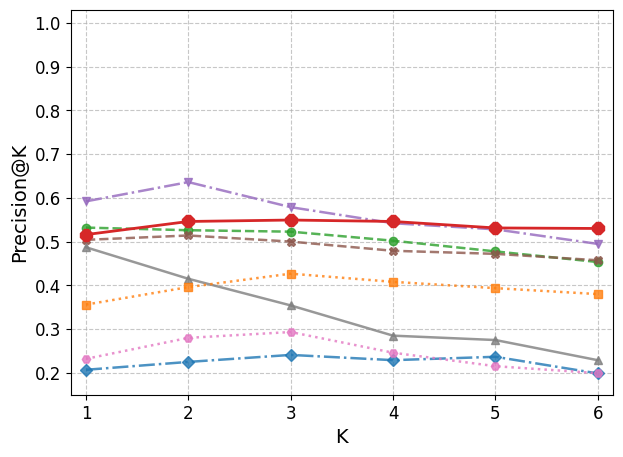

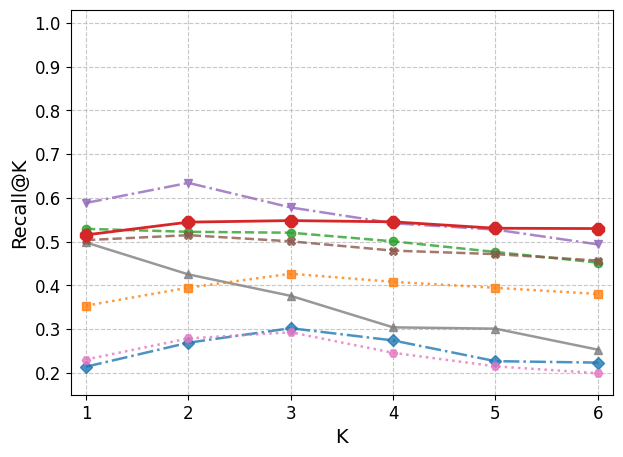

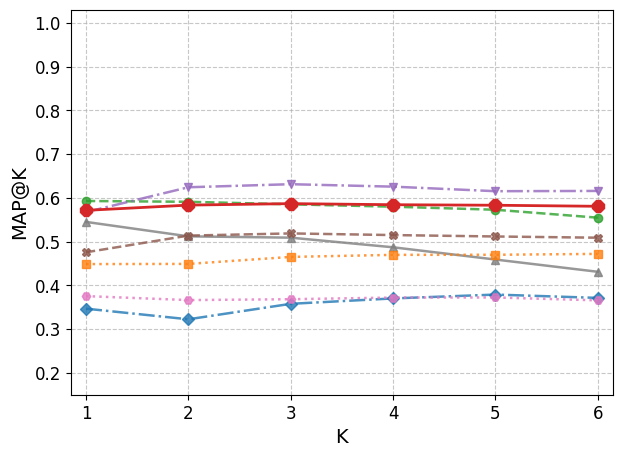

In [11]:
x = range(1, 7)

data = {
    "Precision@K": {
        "Freyja no K": [0.487, 0.415, 0.3541, 0.285, 0.275, 0.2289],
        "Santos": [0.207, 0.225, 0.241, 0.229, 0.2367, 0.1987],
        "D3L": [0.356, 0.396, 0.4267, 0.408, 0.3936, 0.38],
        "WarpGate": [0.532, 0.526, 0.5227, 0.502, 0.4776, 0.4533],
        "Starmie": [0.592, 0.636, 0.5787, 0.542, 0.528, 0.4947],
        "DeepJoin": [0.504, 0.514, 0.5, 0.479, 0.472, 0.4573],
        "KGLiDS": [0.232, 0.28, 0.2933, 0.246, 0.2152, 0.1993],
        "Freyja": [0.516, 0.546, 0.5493, 0.546, 0.5312, 0.53],
    },
    "Recall@K" : {
        "Freyja no K": [0.498, 0.425, 0.376, 0.304, 0.301, 0.253],
        "Santos": [0.214, 0.2689, 0.302, 0.2741, 0.2267, 0.2234],
        "D3L": [0.3535, 0.3947, 0.4266, 0.408, 0.3944, 0.3803],
        "WarpGate": [0.5291, 0.5224, 0.5203, 0.5006, 0.4763, 0.452],
        "Starmie": [0.5884, 0.6342, 0.578, 0.542, 0.5274, 0.4936],
        "DeepJoin": [0.5034, 0.5147, 0.5006, 0.4794, 0.4714, 0.4566],
        "KGLiDS": [0.2305, 0.2787, 0.2928, 0.2458, 0.2149, 0.1993],
        "Freyja": [0.5153, 0.5445, 0.548, 0.5452, 0.5305, 0.5298]

    },
    "MAP@K" : {
        "Freyja no K": [0.545, 0.512, 0.509, 0.487, 0.459, 0.431],
        "Santos": [0.3467, 0.3224, 0.3578, 0.3701, 0.3789, 0.3713],
        "D3L": [0.4486, 0.449, 0.465, 0.4697, 0.4699, 0.4719],
        "WarpGate": [0.5928, 0.591, 0.5852, 0.5798, 0.5728, 0.5547],
        "Starmie": [0.5674, 0.6242, 0.6312, 0.6256, 0.6152, 0.6158],
        "DeepJoin": [0.4756, 0.5137, 0.5187, 0.5149, 0.5117, 0.5089],
        "KGLiDS": [0.3754, 0.3663, 0.3683, 0.3721, 0.3723, 0.3657],
        "Freyja": [0.5714, 0.5834, 0.5868, 0.5843, 0.5831, 0.5807]
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False, ybottom=0.15, ytop=1.03)

### OM CR

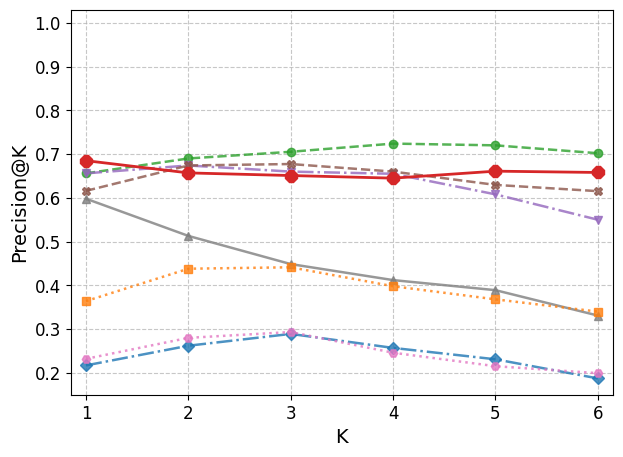

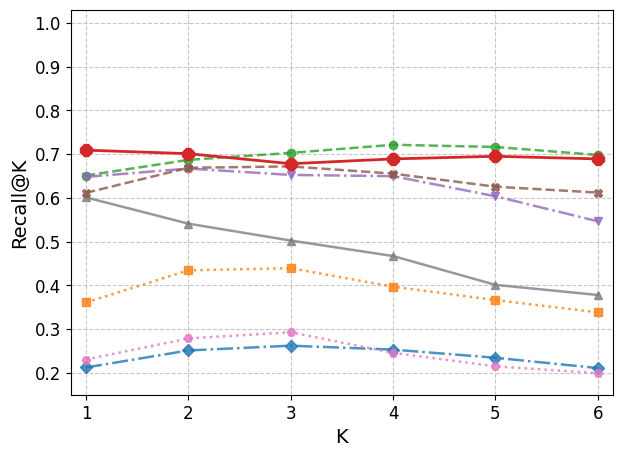

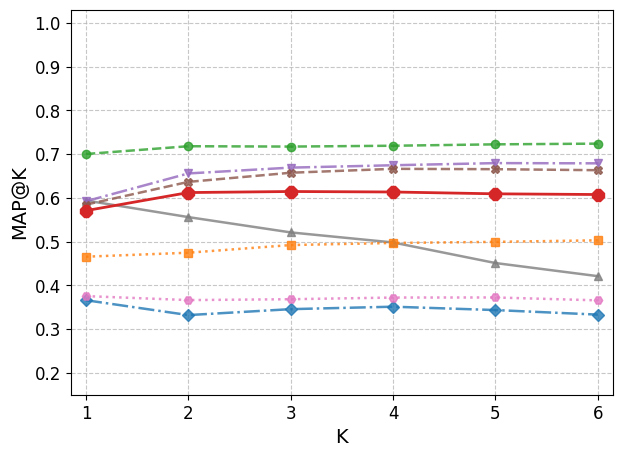

In [12]:
x = range(1, 7)

data = {
    "Precision@K": {
        "Freyja no K": [0.598, 0.513, 0.4486, 0.412, 0.389, 0.331],
        "Santos": [0.217, 0.262, 0.289, 0.257, 0.231, 0.1873],
        "D3L": [0.364, 0.438, 0.4413, 0.398, 0.368, 0.34],
        "WarpGate": [0.656, 0.69, 0.7053, 0.724, 0.72, 0.702],
        "Starmie": [0.656, 0.674, 0.66, 0.655, 0.608, 0.55],
        "DeepJoin": [0.616, 0.674, 0.6773, 0.66, 0.6296, 0.6153],
        "KGLiDS": [0.232, 0.28, 0.2933, 0.246, 0.2152, 0.1993],
        "Freyja": [0.685, 0.657, 0.651, 0.645, 0.661, 0.658],
    },
    "Recall@K" : {
        "Freyja no K": [0.601, 0.541, 0.5024, 0.467, 0.4011, 0.378],
        "Santos": [0.2123, 0.2512, 0.2621, 0.2531, 0.2345, 0.2109],
        "D3L": [0.3609, 0.4343, 0.4392, 0.3969, 0.3664, 0.3382],
        "WarpGate": [0.651, 0.6868, 0.7028, 0.7213, 0.7163, 0.698],
        "Starmie": [0.6479, 0.667, 0.6524, 0.6496, 0.6036, 0.5464],
        "DeepJoin": [0.6115, 0.6687, 0.6719, 0.6553, 0.6255, 0.612],
        "KGLiDS": [0.2305, 0.2787, 0.2928, 0.2458, 0.2149, 0.1993],
        "Freyja": [0.709, 0.701, 0.678, 0.689, 0.695, 0.689]

    },
    "MAP@K" : {
        "Freyja no K": [0.5939, 0.556, 0.521, 0.498, 0.451, 0.421],
        "Santos": [0.366, 0.332, 0.3456, 0.3512, 0.3435, 0.3331],
        "D3L": [0.4655, 0.4746, 0.4921, 0.4969, 0.4994, 0.5029],
        "WarpGate": [0.7002, 0.718, 0.7172, 0.7191, 0.7223, 0.7239],
        "Starmie": [0.5923, 0.6558, 0.6691, 0.6745, 0.6794, 0.6789],
        "DeepJoin": [0.5845, 0.6365, 0.6574, 0.6663, 0.6655, 0.6632],
        "KGLiDS": [0.3754, 0.3663, 0.3683, 0.3721, 0.3723, 0.3657],
        "Freyja": [0.5708, 0.6121, 0.6145, 0.6134, 0.6092, 0.6076]
    }
}

for metric_name, methods in data.items():
    plot_metric(metric_name, methods, x, save=False, ybottom=0.15, ytop=1.03)

# Scalability

### Preprocess time

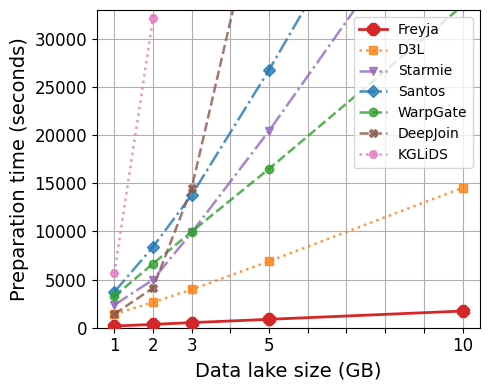

In [ ]:
import matplotlib.pyplot as plt

freyja_times = [171, 347, 529, 874, 1732]
d3l_times = [1412, 2643, 3973, 6899, 14533]
starmie_times = [2356, 4989, 9899, 20456, 48912]
santos_times = [3712, 8403, 13789, 26784, 61456]
warpgate_times = [3257, 6660, 9978, 16513, 33451]
deepjoin_times = [1415, 4124, 14512, 49172, 124010]
kglids_times = [5678, 32141, 88617, 222819, 567181]
indices = [1, 2, 3, 5, 10]

x_ticks = list(range(1, 11))  # Generate ticks from 1 to 10
x_tick_labels = [f'{tick}' if tick in indices else '' for tick in x_ticks]  # Label only where indices are specified

plt.figure(figsize=(5, 4))

plt.plot(indices, freyja_times, marker='8', linestyle='-', color='#d62728', linewidth=2, markersize=9, zorder=10, label='Freyja')
plt.plot(indices, d3l_times, marker='s', linestyle=':', color='#ff7f0e', linewidth=1.8, markersize=6, alpha=0.8, label='D3L')
plt.plot(indices, starmie_times, marker='v', linestyle='-.', color='#9467bd', linewidth=1.8, markersize=6, alpha=0.8, label='Starmie')
plt.plot(indices, santos_times, marker='D', linestyle='-.', color='#1f77b4', linewidth=1.8, markersize=6, alpha=0.8, label='Santos')
plt.plot(indices, warpgate_times, marker='o', linestyle='--', color='#2ca02c', linewidth=1.8, markersize=6, alpha=0.8, label='WarpGate')
plt.plot(indices, deepjoin_times, marker='X', linestyle='--', color='#8c564b', linewidth=1.8, markersize=6, alpha=0.8, label='DeepJoin')
plt.plot(indices, kglids_times, marker='H', linestyle=':', color='#e377c2', linewidth=1.8, markersize=6, alpha=0.8, label='KGLiDS')

plt.xlabel('Data lake size (GB)', fontsize=14)
plt.ylabel('Preparation time (seconds)', fontsize=14)
plt.ylim(0, 33000)
plt.xticks(x_ticks, x_tick_labels)  # Set custom ticks and labels
plt.grid(True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### Query time

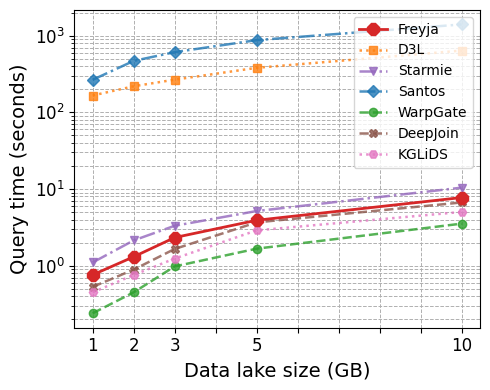

In [14]:
import matplotlib.pyplot as plt

freyja_times = [0.761, 1.309, 2.332, 3.918, 7.749]
starmie_times = [1.104, 2.14, 3.32, 5.17, 10.43]
d3l_times = [166 , 219 , 267, 381, 640]
santos_times = [266, 469, 610, 875, 1402]
warpgate_times = [0.24, 0.45, 0.98, 1.67, 3.54]
deepjoin_times = [0.53, 0.891, 1.654, 3.678, 6.689]
kglids_times = [0.45, 0.758, 1.241, 2.892, 5.031]
indices = [1, 2, 3, 5, 10]

x_ticks = list(range(1, 11))  # Generate ticks from 1 to 10
x_tick_labels = [f'{tick}' if tick in indices else '' for tick in x_ticks]  # Label only where indices are specified

plt.figure(figsize=(5, 4))

plt.plot(indices, freyja_times, marker='8', linestyle='-', color='#d62728', linewidth=2, markersize=9, zorder=10, label='Freyja')
plt.plot(indices, d3l_times, marker='s', linestyle=':', color='#ff7f0e', linewidth=1.8, markersize=6, alpha=0.8, label='D3L')
plt.plot(indices, starmie_times, marker='v', linestyle='-.', color='#9467bd', linewidth=1.8, markersize=6, alpha=0.8, label='Starmie')
plt.plot(indices, santos_times, marker='D', linestyle='-.', color='#1f77b4', linewidth=1.8, markersize=6, alpha=0.8, label='Santos')
plt.plot(indices, warpgate_times, marker='o', linestyle='--', color='#2ca02c', linewidth=1.8, markersize=6, alpha=0.8, label='WarpGate')
plt.plot(indices, deepjoin_times, marker='X', linestyle='--', color='#8c564b', linewidth=1.8, markersize=6, alpha=0.8, label='DeepJoin')
plt.plot(indices, kglids_times, marker='H', linestyle=':', color='#e377c2', linewidth=1.8, markersize=6, alpha=0.8, label='KGLiDS')

plt.xlabel('Data lake size (GB)', fontsize=14)
plt.ylabel('Query time (seconds)', fontsize=14)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xticks(x_ticks, x_tick_labels)  # Set custom ticks and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.7)  # Grid for both major and minor ticks
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Statistical tests

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
def tukey_freyja_only(data_dict, alpha=0.05):
    """
    Perform Tukey HSD test on multiple groups and return only pairs involving 'freyja'.

    Parameters:
    data_dict (dict): Dictionary with group names as keys and list of values as values.
    alpha (float): Significance level.

    Returns:
    pd.DataFrame: Tukey HSD results filtered to pairs involving 'freyja'.
    """
    # Combine all data into a single DataFrame with labels
    data = []
    labels = []
    for group, values in data_dict.items():
        data.extend(values)
        labels.extend([group]*len(values))

    df = pd.DataFrame({'Value': data, 'Group': labels})

    # Perform Tukey HSD test
    tukey = pairwise_tukeyhsd(endog=df['Value'], groups=df['Group'], alpha=alpha)

    # Convert results to DataFrame
    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

    # Filter only pairs involving Freyja
    freyja_pairs = tukey_df[(tukey_df['group1'] == 'freyja') | (tukey_df['group2'] == 'freyja')]
    print(freyja_pairs)

def perform_anova(data, label):
    """
    Perform one-way ANOVA on the given dataset and print results.
    Calls tukey_freyja_only if significant differences are detected.
    """
    f_stat, p_value = stats.f_oneway(*data.values())
    print(f"\nANOVA results for {label}:\nF-statistic = {f_stat:.4f}\np-value = {p_value:.4e}")

    if p_value < 0.05:
        print("Result: Significant differences exist between group means.")
        tukey_freyja_only(data)
    else:
        print("Result: No significant differences detected between group means.")

In [18]:
freyja_bm_data = {
    "freyja": [0.05, 0.01, 0.06, 0.02, 0.08, 0.05, 0.03, 0.17, 0.06, 0.05, 0.06, 0.04, 0.08, 0.04, 0.04, 0.03, 0.05, 0.07, 0.02, 0.01, 0.07, 0.03, 0.02, 0.04, 0.02, 0.04, 0.05, 0.01, 0.04, 0.01],
    "starmie": [0.30, 0.31, 0.32, 0.33, 0.32, 0.31, 0.30, 0.29, 0.28, 0.50, 0.31, 0.32, 0.32, 0.33, 0.32, 0.31, 0.30, 0.29, 0.15, 0.28, 0.29, 0.31, 0.32, 0.33, 0.34, 0.32, 0.31, 0.30, 0.29, 0.52],
    "d3l": [128, 129, 130, 131, 130, 129, 128, 127, 126, 150, 129, 130, 130, 131, 131, 130, 129, 128, 110, 127, 127, 129, 130, 131, 132, 130, 129, 128, 127, 152],
    "santos": [243, 244, 245, 246, 245, 244, 243, 242, 240, 268, 244, 245, 245, 246, 246, 245, 244, 243, 220, 242, 242, 244, 245, 246, 247, 245, 244, 243, 242, 270],
    "deepjoin": [0.02, 0.06, 0.0, 0.0, 0.01, 0.03, 0.02, 0.02, 0.02, 0.05, 0.07, 0.03, 0.0, 0.03, 0.02, 0.0, 0.04, 0.05, 0.04, 0.03, 0.02, 0.01, 0.05, 0.01, 0.02, 0.02, 0.03, 0.01, 0.01, 0.02],
    "kglids": [0.03, 0.05, 0.08, 0.09, 0.07, 0.02, 0.1, 0.08, 0.09, 0.04, 0.09, 0.05, 0.08, 0.09, 0.09, 0.11, 0.06, 0.05, 0.04, 0.07, 0.08, 0.04, 0.33, 0.07, 0.1, 0.07, 0.03, 0.08, 0.05, 0.04],
    "warpgate": [0.01, 0.01, 0.01, 0.05, 0.05, 0.03, 0.01, 0.0, 0.0, 0.02, 0.04, 0.0, 0.02, 0.0, 0.0, 0.06, 0.03, 0.01, 0.04, 0.01, 0.02, 0.0, 0.01, 0.01, 0.02, 0.03, 0.0, 0.01, 0.04, 0.02]
}

santos_small_data = {
    "freyja": [0.25, 0.27, 0.1, 0.24, 0.25, 0.22, 0.23, 0.23, 0.24, 0.59, 0.25, 0.25, 0.21, 0.22, 0.26, 0.26, 0.25, 0.25, 0.58, 0.24, 0.25, 0.21, 0.24, 0.23, 0.24, 0.24, 0.26, 0.28, 0.24, 0.23],
    "starmie": [1.75, 1.79, 1.81, 1.82, 1.83, 1.82, 1.81, 1.79, 1.70, 2.20, 1.77, 1.80, 1.82, 1.83, 1.84, 1.82, 1.81, 1.80, 1.20, 1.78, 1.73, 1.79, 1.81, 1.82, 1.84, 1.83, 1.81, 1.80, 1.76, 2.25],
    "d3l": [140, 141, 142, 143, 142, 141, 140, 139, 138, 160, 141, 142, 142, 143, 143, 142, 141, 140, 120, 139, 139, 141, 142, 143, 144, 142, 141, 140, 139, 162],
    "santos": [253, 254, 255, 256, 255, 254, 253, 252, 250, 278, 254, 255, 255, 256, 256, 255, 254, 253, 230, 252, 252, 254, 255, 256, 257, 255, 254, 253, 252, 280],
    "deepjoin": [0.23, 0.19, 0.21, 0.18, 0.19, 0.12, 0.23, 0.2, 0.21, 0.18, 0.2, 0.18, 0.22, 0.17, 0.19, 0.14, 0.23, 0.01, 0.24, 0.18, 0.18, 0.18, 0.21, 0.22, 0.2, 0.18, 0.2, 0.23, 0.23, 0.2],
    "kglids": [0.16, 0.18, 0.15, 0.16, 0.18, 0.03, 0.16, 0.17, 0.23, 0.19, 0.2, 0.23, 0.21, 0.31, 0.22, 0.18, 0.19, 0.18, 0.18, 0.17, 0.16, 0.18, 0.17, 0.09, 0.21, 0.15, 0.16, 0.18, 0.2, 0.17],
    "warpgate": [0.12, 0.14, 0.14, 0.18, 0.15, 0.12, 0.12, 0.11, 0.12, 0.12, 0.48, 0.15, 0.13, 0.16, 0.14, 0.12, 0.11, 0.14, 0.14, 0.12, 0.11, 0.16, 0.15, 0.14, 0.19, 0.15, 0.12, 0.14, 0.42, 0.1]
}

tus_small_data = {
    "freyja": [0.78, 0.77, 1.22, 0.75, 0.76, 0.76, 0.79, 0.5, 0.76, 0.76, 0.77, 0.8, 0.79, 0.78, 0.75, 0.73, 0.6, 0.77, 0.8, 0.75, 0.79, 0.76, 0.82, 0.77, 0.79, 0.79, 0.74, 0.77, 0.74, 0.78],
    "starmie": [2.48, 2.52, 2.55, 2.56, 2.57, 2.56, 2.55, 2.52, 2.40, 2.90, 2.50, 2.53, 2.56, 2.57, 2.58, 2.56, 2.55, 2.53, 1.90, 2.51, 2.46, 2.52, 2.55, 2.56, 2.58, 2.57, 2.55, 2.53, 2.49, 2.95],
    "d3l": [171, 172, 173, 174, 173, 172, 171, 170, 168, 190, 172, 173, 173, 174, 174, 173, 172, 171, 150, 170, 170, 172, 173, 174, 175, 173, 172, 171, 170, 192],
    "santos": [247, 248, 249, 250, 249, 248, 247, 246, 244, 272, 248, 249, 249, 250, 250, 249, 248, 247, 225, 246, 246, 248, 249, 250, 251, 249, 248, 247, 246, 274],
    "deepjoin": [0.38, 0.33, 0.33, 0.59, 0.36, 0.35, 0.36, 0.35, 0.18, 0.59, 0.36, 0.39, 0.39, 0.34, 0.36, 0.35, 0.35, 0.35, 0.39, 0.34, 0.37, 0.37, 0.34, 0.36, 0.35, 0.38, 0.34, 0.35, 0.38, 0.33],
    "kglids": [0.32, 0.3, 0.34, 0.01, 0.33, 0.31, 0.36, 0.3, 0.33, 0.38, 0.37, 0.36, 0.74, 0.36, 0.31, 0.31, 0.33, 0.37, 0.34, 0.32, 0.36, 0.35, 0.32, 0.36, 0.34, 0.36, 0.36, 0.32, 0.35, 0.26],
    "warpgate": [0.13, 0.15, 0.15, 0.08, 0.13, 0.16, 0.2, 0.17, 0.13, 0.08, 0.13, 0.16, 0.13, 0.13, 0.14, 0.19, 0.15, 0.13, 0.18, 0.11, 0.14, 0.02, 0.16, 0.17, 0.16, 0.11, 0.15, 0.17, 0.15, 0.15]
}

d3l_bm_data = {
    "freyja": [0.36, 0.2, 0.34, 0.35, 0.35, 0.36, 0.36, 0.33, 0.33, 0.32, 0.49, 0.37, 0.35, 0.36, 0.39, 0.33, 0.38, 0.35, 0.33, 0.33, 0.32, 0.32, 0.35, 0.36, 0.37, 0.32, 0.36, 0.34, 0.78, 0.33],
    "starmie": [3.55, 3.59, 3.62, 3.63, 3.64, 3.63, 3.61, 3.59, 3.45, 4.00, 3.57, 3.60, 3.62, 3.63, 3.65, 3.63, 3.62, 3.60, 2.90, 3.58, 3.53, 3.59, 3.62, 3.64, 3.65, 3.64, 3.62, 3.60, 3.55, 4.05],
    "d3l": [151, 152, 153, 154, 153, 152, 151, 150, 148, 170, 152, 153, 153, 154, 154, 153, 152, 151, 130, 150, 150, 152, 153, 154, 155, 153, 152, 151, 150, 172],
    "santos": [265, 266, 267, 268, 267, 266, 265, 264, 262, 290, 266, 267, 267, 268, 268, 267, 266, 265, 240, 264, 264, 266, 267, 268, 269, 267, 266, 265, 264, 292],
    "deepjoin": [0.49, 0.47, 0.48, 0.22, 0.5, 0.48, 0.51, 0.49, 0.5, 0.49, 0.53, 0.52, 0.48, 0.51, 0.45, 0.51, 0.48, 0.52, 0.5, 0.5, 0.48, 0.51, 0.7, 0.47, 0.46, 0.49, 0.47, 0.78, 0.5, 0.49],
    "kglids": [0.26, 0.26, 0.24, 0.24, 0.26, 0.17, 0.27, 0.26, 0.3, 0.28, 0.25, 0.28, 0.23, 0.29, 0.29, 0.24, 0.19, 0.29, 0.11, 0.24, 0.3, 0.26, 0.26, 0.29, 0.26, 0.27, 0.26, 0.29, 0.23, 0.27],
    "warpgate": [0.2, 0.22, 0.2, 0.17, 0.21, 0.23, 0.21, 0.2, 0.23, 0.09, 0.25, 0.21, 0.21, 0.22, 0.24, 0.22, 0.24, 0.22, 0.24, 0.24, 0.2, 0.22, 0.19, 0.23, 0.22, 0.2, 0.27, 0.18, 0.25, 0.24]
}

tus_big_data = {
    "freyja": [1.85, 1.88, 1.94, 1.9, 1.93, 1.91, 1.89, 1.9, 1.87, 1.93, 1.86, 1.93, 1.68, 1.89, 1.89, 1.91, 1.99, 1.9, 1.88, 1.9, 1.89, 1.9, 1.92, 1.93, 1.92, 1.93, 1.89, 1.96, 1.89, 1.89],
    "starmie": [4.80, 4.86, 4.90, 4.91, 4.92, 4.91, 4.90, 4.87, 4.70, 5.30, 4.83, 4.88, 4.90, 4.91, 4.93, 4.91, 4.90, 4.88, 3.90, 4.87, 4.78, 4.86, 4.89, 4.91, 4.93, 4.92, 4.90, 4.88, 4.84, 5.35],
    "d3l": [193, 194, 195, 196, 195, 194, 193, 192, 190, 215, 194, 195, 195, 196, 196, 195, 194, 193, 170, 192, 192, 194, 195, 196, 197, 195, 194, 193, 192, 217],
    "santos": [273, 274, 275, 276, 275, 274, 273, 272, 270, 298, 274, 275, 275, 276, 276, 275, 274, 273, 250, 272, 272, 274, 275, 276, 277, 275, 274, 273, 272, 300],
    "deepjoin": [2.59, 2.58, 2.61, 2.58, 2.59, 2.6, 2.57, 2.59, 2.61, 2.6, 2.75, 2.57, 2.56, 2.63, 2.63, 2.59, 2.61, 2.34, 2.61, 2.6, 2.28, 2.57, 2.6, 2.59, 2.59, 2.61, 2.62, 2.6, 2.6, 2.61],
    "kglids": [1.08, 0.67, 1.11, 1.14, 1.07, 1.09, 1.12, 1.12, 1.12, 1.11, 1.08, 1.09, 1.29, 1.13, 1.11, 1.09, 1.11, 1.08, 1.1, 1.08, 1.1, 1.09, 1.1, 1.14, 1.0, 1.08, 1.11, 1.11, 1.09, 1.07],
    "warpgate": [0.59, 0.55, 0.56, 1.02, 0.58, 0.58, 0.59, 0.57, 1.04, 0.56, 0.56, 0.6, 0.59, 0.57, 0.58, 0.6, 0.57, 0.55, 0.6, 0.55, 0.57, 0.55, 0.89, 0.57, 0.55, 0.56, 0.6, 0.58, 0.62, 0.58]
}

santos_big_data = {
    "freyja": [3.97, 3.98, 3.94, 4.0, 3.99, 3.98, 3.97, 3.93, 3.97, 3.95, 3.96, 3.96, 3.96, 3.96, 3.66, 3.97, 3.97, 3.95, 3.73, 3.96, 4.43, 3.95, 3.98, 3.95, 3.96, 3.98, 3.97, 3.96, 3.97, 3.94],
    "starmie": [19.05, 19.15, 19.22, 19.25, 19.27, 19.25, 19.22, 19.16, 18.80, 20.10, 19.10, 19.18, 19.23, 19.25, 19.28, 19.26, 19.23, 19.18, 17.50, 19.12, 19.00, 19.16, 19.22, 19.25, 19.29, 19.27, 19.23, 19.18, 19.05, 20.20],
    "d3l": [241, 242, 243, 244, 243, 242, 241, 240, 238, 265, 242, 243, 243, 244, 244, 243, 242, 241, 220, 240, 240, 242, 243, 244, 245, 243, 242, 241, 240, 267],
    "santos": [285, 286, 287, 288, 287, 286, 285, 284, 282, 310, 286, 287, 287, 288, 288, 287, 286, 285, 260, 284, 284, 286, 287, 288, 289, 287, 286, 285, 284, 312],
    "deepjoin": [4.12, 3.75, 3.77, 3.33, 3.73, 3.75, 3.79, 3.79, 3.79, 3.78, 3.81, 3.79, 3.77, 3.81, 3.77, 3.76, 3.77, 3.77, 3.77, 3.75, 3.48, 3.81, 3.78, 3.79, 3.76, 3.77, 3.73, 3.75, 3.74, 3.78],
    "kglids": [2.92, 2.62, 2.89, 2.95, 2.94, 2.96, 2.9, 2.96, 2.94, 2.94, 2.94, 2.94, 2.93, 2.93, 2.94, 2.93, 2.52, 2.97, 2.52, 2.88, 2.93, 2.95, 2.93, 2.92, 2.93, 2.94, 2.95, 2.93, 2.92, 2.94],
    "warpgate": [1.98, 2.28, 1.95, 1.94, 1.96, 1.94, 1.98, 1.94, 1.97, 1.91, 1.96, 1.94, 1.93, 2.34, 1.97, 1.93, 1.98, 1.94, 1.93, 1.94, 1.92, 1.94, 2.2, 1.95, 1.99, 1.93, 1.96, 1.96, 1.97, 1.94]
}

omnimatch_cg_data = {
    "freyja": [0.01, 0.03, 0.05, 0.07, 0.03, 0.07, 0.06, 0.02, 0.03, 0.05, 0.03, 0.02, 0.04, 0.03, 0.05, 0.1, 0.01, 0.02, 0.01, 0.05, 0.03, 0.02, 0.05, 0.01, 0.01, 0.06, 0.05, 0.03, 0.03, 0.51],
    "starmie": [0.09, 0.07, 0.07, 0.11, 0.1, 0.09, 0.05, 0.07, 0.1, 0.09, 0.07, 0.03, 0.07, 0.08, 0.12, 0.1, 0.1, 0.09, 0.08, 0.1, 0.13, 0.14, 0.04, 0.09, 0.07, 0.1, 0.11, 0.13, 0.04, 0.09],
    "d3l": [111.97, 112.01, 112.01, 111.97, 111.96, 112.01, 112.44, 112.0, 112.01, 112.0, 112.0, 111.98, 112.0, 112.0, 112.02, 112.01, 112.03, 112.0, 112.01, 112.01, 112.02, 112.01, 112.0, 112.01, 112.01, 111.98, 112.48, 111.98, 111.98, 111.98],
    "santos": [237.95, 238.0, 238.0, 238.04, 238.0, 238.19, 238.01, 237.98, 237.99, 238.0, 237.97, 238.04, 238.0, 238.0, 237.97, 238.01, 237.99, 238.02, 238.01, 238.02, 238.01, 238.0, 237.98, 237.62, 237.97, 237.57, 237.98, 238.01, 237.98, 237.99],
    "deepjoin": [0.0, 0.03, 0.05, 0.01, 0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.03, 0.02, 0.0, 0.01, 0.04, 0.03, 0.0, 0.0, 0.01, 0.03, 0.02, 0.03, 0.04, 0.02, 0.01, 0.0, 0.04, 0.0, 0.03, 0.02],
    "kglids": [0.09, 0.1, 0.11, 0.1, 0.04, 0.11, 0.08, 0.1, 0.12, 0.13, 0.08, 0.1, 0.11, 0.09, 0.09, 0.24, 0.08, 0.08, 0.0, 0.09, 0.1, 0.13, 0.12, 0.1, 0.07, 0.09, 0.13, 0.07, 0.12, 0.08],
    "warpgate": [0.0, 0.05, 0.0, 0.15, 0.02, 0.01, 0.02, 0.01, 0.03, 0.02, 0.01, 0.02, 0.0, 0.0, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02, 0.0, 0.02, 0.01, 0.02, 0.01, 0.0, 0.01, 0.05]
}

omnimatch_cr_data = {
    "freyja": [0.06, 0.03, 0.02, 0.08, 0.04, 0.05, 0.04, 0.05, 0.02, 0.09, 0.01, 0.03, 0.01, 0.04, 0.01, 0.05, 0.04, 0.49, 0.06, 0.03, 0.03, 0.05, 0.04, 0.07, 0.02, 0.04, 0.05, 0.1, 0.02, 0.07],
    "starmie":[0.1, 0.1, 0.05, 0.07, 0.06, 0.11, 0.11, 0.12, 0.1, 0.11, 0.06, 0.08, 0.1, 0.11, 0.1, 0.1, 0.13, 0.05, 0.11, 0.13, 0.09, 0.1, 0.1, 0.09, 0.08, 0.1, 0.08, 0.11, 0.39, 0.08],
    "d3l": [109.97, 109.99, 110.01, 110.04, 110.04, 109.98, 109.52, 109.99, 110.02, 109.99, 110.0, 109.62, 110.0, 109.97, 109.97, 109.99, 109.98, 109.98, 110.0, 110.03, 110.02, 110.0, 110.01, 110.0, 110.01, 110.03, 109.87, 109.97, 109.98, 109.99],
    "santos": [239.01, 239.04, 239.28, 239.01, 239.02, 238.97, 239.01, 239.01, 238.98, 238.99, 238.98, 239.01, 238.99, 238.99, 238.97, 238.98, 239.0, 239.03, 238.95, 239.0, 239.0, 239.0, 239.02, 238.98, 239.48, 239.0, 239.02, 239.01, 238.99, 239.04],
    "deepjoin": [0.06, 0.01, 0.04, 0.09, 0.05, 0.02, 0.03, 0.02, 0.06, 0.01, 0.03, 0.01, 0.01, 0.02, 0.01, 0.03, 0.02, 0.05, 0.05, 0.02, 0.01, 0.01, 0.02, 0.03, 0.18, 0.05, 0.02, 0.0, 0.01, 0.04],
    "kglids": [0.11, 0.09, 0.08, 0.1, 0.11, 0.06, 0.13, 0.12, 0.12, 0.1, 0.09, 0.14, 0.11, 0.12, 0.13, 0.13, 0.13, 0.09, 0.09, 0.1, 0.03, 0.13, 0.09, 0.08, 0.1, 0.09, 0.09, 0.1, 0.08, 0.43],
    "warpgate": [0.01, 0.03, 0.26, 0.01, 0.02, 0.01, 0.0, 0.05, 0.01, -0.0, 0.03, 0.03, 0.0, 0.02, 0.03, 0.02, -0.0, 0.01, 0.05, 0.0, 0.0, 0.01, 0.03, 0.01, 0.04, 0.03, 0.04, 0.01, 0.02, 0.05]
}

perform_anova(freyja_bm_data, "freyja_bm")
perform_anova(santos_small_data, "santos_small")
perform_anova(tus_small_data, "tus_small")
perform_anova(d3l_bm_data, "d3l")
perform_anova(tus_big_data, "tus_big")
perform_anova(santos_big_data, "santos_big")
perform_anova(omnimatch_cg_data, "omnimatch_cg")
perform_anova(omnimatch_cr_data, "omnimatch_cr")


ANOVA results for freyja_bm:
F-statistic = 17799.8203
p-value = 2.8223e-273
Result: Significant differences exist between group means.
      group1    group2  meandiff  p-adj     lower     upper  reject
1        d3l    freyja -129.8883    0.0 -132.9585 -126.8182    True
6   deepjoin    freyja    0.0203    1.0   -3.0498    3.0905   False
11    freyja    kglids    0.0307    1.0   -3.0395    3.1008   False
12    freyja    santos  244.8883    0.0  241.8182  247.9585    True
13    freyja   starmie    0.2723    1.0   -2.7978    3.3425   False
14    freyja  warpgate   -0.0263    1.0   -3.0965    3.0438   False

ANOVA results for santos_small:
F-statistic = 20020.1715
p-value = 1.8979e-278
Result: Significant differences exist between group means.
      group1    group2  meandiff   p-adj     lower     upper  reject
1        d3l    freyja -141.4730  0.0000 -144.5064 -138.4396    True
6   deepjoin    freyja    0.0693  1.0000   -2.9641    3.1027   False
11    freyja    kglids   -0.0820  1.0000  

In [19]:
with open('C:/Projects/freyja_repo/data/scores.txt', 'r') as f:
    code = f.read()

exec(code) # Execute file content (defines the variables in your current namespace)

In [22]:
datasets = {
    "freyja_bm_data": freyja_bm_data,
    "santos_small_data": santos_small_data,
    "tus_small_data": tus_small_data,
    "d3l_bm_data": d3l_bm_data,
    "tus_big_data": tus_big_data,
    "santos_big_data": santos_big_data
}

def compute_confidence_intervals(data, confidence=0.95):
    results = {}
    for key, values in data.items():
        arr = np.array(values)
        n = len(arr)
        mean = np.mean(arr)
        sem = stats.sem(arr)
        h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
        results[key] = (mean, mean-h, mean+h)
    return results

all_ci = {name: compute_confidence_intervals(d) for name, d in datasets.items()}
ci_df = pd.concat({k: pd.DataFrame(v, index=["mean", "lower", "upper"]).T for k, v in all_ci.items()})
# ci_df

# Convert CI into mean ± range format
ci_summary = {}

for dataset, df in ci_df.groupby(level=0):
    ci_summary[dataset] = {}
    for metric, row in df.droplevel(0).iterrows():
        mean = row["mean"]
        lower = row["lower"]
        upper = row["upper"]
        half_range = (upper - lower) / 2
        ci_summary[dataset][metric] = f"{mean:.3f} ± {half_range:.3f}"

summary_df = pd.DataFrame(ci_summary)
summary_df

,d3l_bm_data,freyja_bm_data,santos_big_data,santos_small_data,tus_big_data,tus_small_data
freyja,0.361 ± 0.034,0.045 ± 0.012,3.962 ± 0.042,0.260 ± 0.035,1.898 ± 0.019,0.771 ± 0.039
starmie,3.607 ± 0.066,0.317 ± 0.023,19.188 ± 0.155,1.808 ± 0.060,4.875 ± 0.083,2.539 ± 0.060
d3l,152.600 ± 2.466,129.933 ± 2.563,242.933 ± 2.842,141.733 ± 2.488,194.733 ± 2.772,172.600 ± 2.466
santos,266.867 ± 3.080,244.933 ± 2.998,286.867 ± 3.080,254.933 ± 2.998,274.933 ± 2.998,248.967 ± 2.959
deepjoin,0.499 ± 0.032,0.025 ± 0.007,3.759 ± 0.044,0.191 ± 0.016,2.583 ± 0.030,0.367 ± 0.026
kglids,0.255 ± 0.015,0.076 ± 0.020,2.895 ± 0.044,0.178 ± 0.017,1.089 ± 0.034,0.339 ± 0.037
warpgate,0.215 ± 0.012,0.019 ± 0.006,1.982 ± 0.038,0.156 ± 0.031,0.616 ± 0.048,0.140 ± 0.013


In [24]:
from scipy.stats import wilcoxon
import math
import pandas as pd

metrics = ["precision", "recall"]
alpha = 0.05

def compute_wilcoxon_grid(list1_scores, list2_scores, list1_name, list2_name, n_steps):
    grid = pd.DataFrame(index=range(1, n_steps+1), columns=metrics)

    for metric in metrics:
        for idx in range(n_steps):
            vals1 = []
            vals2 = []

            for dataset_field in list1_scores:
                if dataset_field in list2_scores:
                    vals1.append(list1_scores[dataset_field][metric][idx])
                    vals2.append(list2_scores[dataset_field][metric][idx])

            if len(vals1) > 0:
                diff = np.array(vals1) - np.array(vals2)
                # If all differences are zero, skip or assign neutral result
                if np.all(diff == 0):
                    grid.at[idx+1, metric] = "All differences zero (p=1.0)"
                    continue

                try:
                    _, p = wilcoxon(vals1, vals2)
                    significance = "Significant" if p < alpha or math.isnan(p) else "Not significant"
                    grid.at[idx+1, metric] = f"{p:.4f} ({significance})"
                except ValueError as e:
                    grid.at[idx+1, metric] = f"Error: {str(e)}"
            else:
                grid.at[idx+1, metric] = "N/A"

    grid.index.name = "Index"
    grid.columns.name = f"{list1_name} vs {list2_name}"
    return grid

benchmarks = ["freyja", "santos_small", "tus_small", "tus_big", "d3l", "om_cg", "om_cr"]
systems = ["freyja", "santos", "starmie", "d3l", "freyja_no_k", "warpgate", "deepjoin", "kglids"]

def run_wilcoxon_tests():
  for benchmark in benchmarks:
    print(f"\n===== {benchmark.upper()} =====\n")

    for system in systems:
      try:
        # dynamically build variable names
        scores_a = globals()[f"{benchmark}_freyja_scores"]
        scores_b = globals()[f"{benchmark}_{system}_scores"]

        n_steps = 10
        if benchmark in ["tus_small", "tus_big", "om_cg", "om_cr"]:
          n_steps = 6
        grid = compute_wilcoxon_grid(scores_a, scores_b, "freyja", system, n_steps)

        print(f"Wilcoxon test grid: freyja vs {system}\n")
        print(grid)
        print()
      except KeyError:
      # skip if a variable doesn’t exist
        continue

run_wilcoxon_tests()


===== FREYJA =====

Wilcoxon test grid: freyja vs freyja

freyja vs freyja                     precision                        recall
Index                                                                       
1                 All differences zero (p=1.0)  All differences zero (p=1.0)
2                 All differences zero (p=1.0)  All differences zero (p=1.0)
3                 All differences zero (p=1.0)  All differences zero (p=1.0)
4                 All differences zero (p=1.0)  All differences zero (p=1.0)
5                 All differences zero (p=1.0)  All differences zero (p=1.0)
6                 All differences zero (p=1.0)  All differences zero (p=1.0)
7                 All differences zero (p=1.0)  All differences zero (p=1.0)
8                 All differences zero (p=1.0)  All differences zero (p=1.0)
9                 All differences zero (p=1.0)  All differences zero (p=1.0)
10                All differences zero (p=1.0)  All differences zero (p=1.0)

Wilcoxon test gr

In [25]:
pvals = {
    "efficiency": {
        "freyja_bm": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.9987, "freyja_vs_deepjoin": 1.0000, "freyja_vs_warpgate": 1.000, "freyja_vs_kglids": 1.000},
        "santos_small": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.7717, "freyja_vs_deepjoin": 1.0000, "freyja_vs_warpgate": 1.000, "freyja_vs_kglids": 1.000},
        "tus_small": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.6047, "freyja_vs_deepjoin": 0.997, "freyja_vs_warpgate": 0.9959, "freyja_vs_kglids": 0.9995},
        "d3l_bm": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.1029, "freyja_vs_deepjoin": 1.0000, "freyja_vs_warpgate": 1.000, "freyja_vs_kglids": 1.000},
        "tus_big": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.8123, "freyja_vs_deepjoin": 0.9953, "freyja_vs_warpgate": 0.9885, "freyja_vs_kglids": 0.8931},
        "santos_big": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.0, "freyja_vs_deepjoin": 1.0000, "freyja_vs_warpgate": 0.5460, "freyja_vs_kglids": 0.9593},
        "om_cg": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.5265, "freyja_vs_deepjoin": 0.5832, "freyja_vs_warpgate": 0.6685, "freyja_vs_kglids": 0.3003},
        "om_cr": {"freyja_vs_d3l": 0.0000, "freyja_vs_santos": 0.0000, "freyja_vs_starmie": 0.2377, "freyja_vs_deepjoin": 0.8931, "freyja_vs_warpgate": 0.7462, "freyja_vs_kglids": 0.1081},
    },
    "effectiveness": {
        "santos_small": {
            "freyja_vs_starmie": {
                "precision": [0.0468, 0.0588, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0000],
                "recall": [0.0456, 0.0588, 0.0339, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0075, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0393, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0167, 0.0108, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0169, 0.0112, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.3173, 0.0000, 0.000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0382, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.3173, 0.0422, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0000],
                "recall": [0.0445, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.3173, 0.0405, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0049],
                "recall": [0.0349, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0075, 0.0049]
            },
            "freyja_vs_kglids": {
                "precision": [0.0000, 0.0422, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0000, 0.0000],
                "recall": [0.0341, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0076, 0.0000]
            }
        },
        "tus_small": {
            "freyja_vs_starmie": {
                "precision": [0.0011, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0013, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.0000, 0.0000, 0.000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_kglids": {
                "precision": [0.0011, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0014, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            }
        },
        "tus_big": {
            "freyja_vs_starmie": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0679, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.0014, 0.0000, 0.000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.0679, 0.0171, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0415, 0.0171, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_kglids": {
                "precision": [0.0011, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0014, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            }
        },
        "d3l": {
            "freyja_vs_starmie": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.0445, 0.0000, 0.000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0449, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.0445, 0.0422, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0000],
                "recall": [0.0449, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.0445, 0.0455, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0049],
                "recall": [0.0449, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0075, 0.0049]
            },
            "freyja_vs_kglids": {
                "precision": [0.0000, 0.0422, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0000, 0.0000],
                "recall": [0.0449, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0076, 0.0000]
            }
        },
        "freyja": {
            "freyja_vs_starmie": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.0000, 0.0000, 1.000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_kglids": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            }
        },
        "om_cg": {
            "freyja_vs_starmie": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.0000, 0.0000, 0.000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_kglids": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            }
        },
        "om_cr": {
            "freyja_vs_starmie": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_santos": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_d3l": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_mj": {
                "precision": [0.0000, 0.0000, 0.000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_warpgate": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_deepjoin": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            },
            "freyja_vs_kglids": {
                "precision": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
                "recall": [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
            }
        },
    }

}

def extract_pvalues(pvals):
    """Flatten nested dict of p-values into a simple list of floats."""
    all_pvalues = []

    # Handle 'efficiency' block
    for model, comparisons in pvals.get("efficiency", {}).items():
        for comp, p in comparisons.items():
            all_pvalues.append(p)

    # Handle 'effectiveness' block
    for model, comparisons in pvals.get("effectiveness", {}).items():
        for comp, metrics in comparisons.items():
            for metric, values in metrics.items():
                # values are sets of floats
                all_pvalues.extend(values)

    return all_pvalues


# Example usage
all_p = extract_pvalues(pvals)
print("Extracted p-values:", all_p)
print("Total number of p-values:", len(all_p))

Extracted p-values: [0.0, 0.0, 0.9987, 1.0, 1.0, 1.0, 0.0, 0.0, 0.7717, 1.0, 1.0, 1.0, 0.0, 0.0, 0.6047, 0.997, 0.9959, 0.9995, 0.0, 0.0, 0.1029, 1.0, 1.0, 1.0, 0.0, 0.0, 0.8123, 0.9953, 0.9885, 0.8931, 0.0, 0.0, 0.0, 1.0, 0.546, 0.9593, 0.0, 0.0, 0.5265, 0.5832, 0.6685, 0.3003, 0.0, 0.0, 0.2377, 0.8931, 0.7462, 0.1081, 0.0468, 0.0588, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0, 0.0456, 0.0588, 0.0339, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0167, 0.0108, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0169, 0.0112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3173, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0382, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3173, 0.0422, 0.0339, 0.0167, 0.0108, 0.0112, 0.0111, 0.0111, 0.0075, 0.0, 0.0445, 0.0422, 0.0394, 0.0169, 0.0112, 0.0113, 0.0114, 0.0112, 0.0, 0.0, 0.3173, 0.0405, 0.0339, 0.0167, 0.0108, 0.0112, 0.01

In [ ]:
import numpy as np

def benjamini_hochberg(p_values, q=0.05):
    """
    Perform Benjamini-Hochberg FDR correction.

    Parameters:
        p_values (list or array): list of p-values from multiple tests
        q (float): desired false discovery rate (default 0.05)

    Returns:
        rejected (np.array): boolean array, True if the null hypothesis is rejected
        p_value_threshold (float): the largest p-value that is still significant
    """
    p_values = np.array(p_values)
    m = len(p_values)  # total number of tests

    # Sort p-values and keep track of their original indices
    sorted_indices = np.argsort(p_values)
    sorted_pvals = p_values[sorted_indices]

    # Compute thresholds
    thresholds = (np.arange(1, m+1) / m) * q

    # Find the largest p-value that is below its threshold
    below_threshold = sorted_pvals <= thresholds
    if not np.any(below_threshold):
        # No significant results
        return np.array([False] * m), None

    max_i = np.max(np.where(below_threshold)[0])
    p_value_threshold = sorted_pvals[max_i]

    # Reject all nulls with p <= threshold
    rejected = p_values <= p_value_threshold

    return rejected, p_value_threshold

# Example usage
rejected, cutoff = benjamini_hochberg(all_p, q=0.05)
num_false = np.sum(~rejected) # Count False values
total = len(rejected)
percentage_false = (num_false / total) * 100

print(f"Number of False values: {num_false}")
print(f"Percentage of False values: {percentage_false:.2f}%")

print("Cutoff p-value:", cutoff)
print("Rejected hypotheses:", rejected)

Number of False values: 39
Percentage of False values: 4.85%
Cutoff p-value: 0.0468
Rejected hypotheses: [ True  True False False False False  True  True False False False False
  True  True False False False False  True  True False False False False
  True  True False False False False  True  True  True False False False
  True  True False False False False  True  True False False False False
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True 